# Working with Keras on CIFAR100 dataset
A dataset of 32x32 rgb images with 100 classes.
https://www.cs.toronto.edu/~kriz/cifar.html
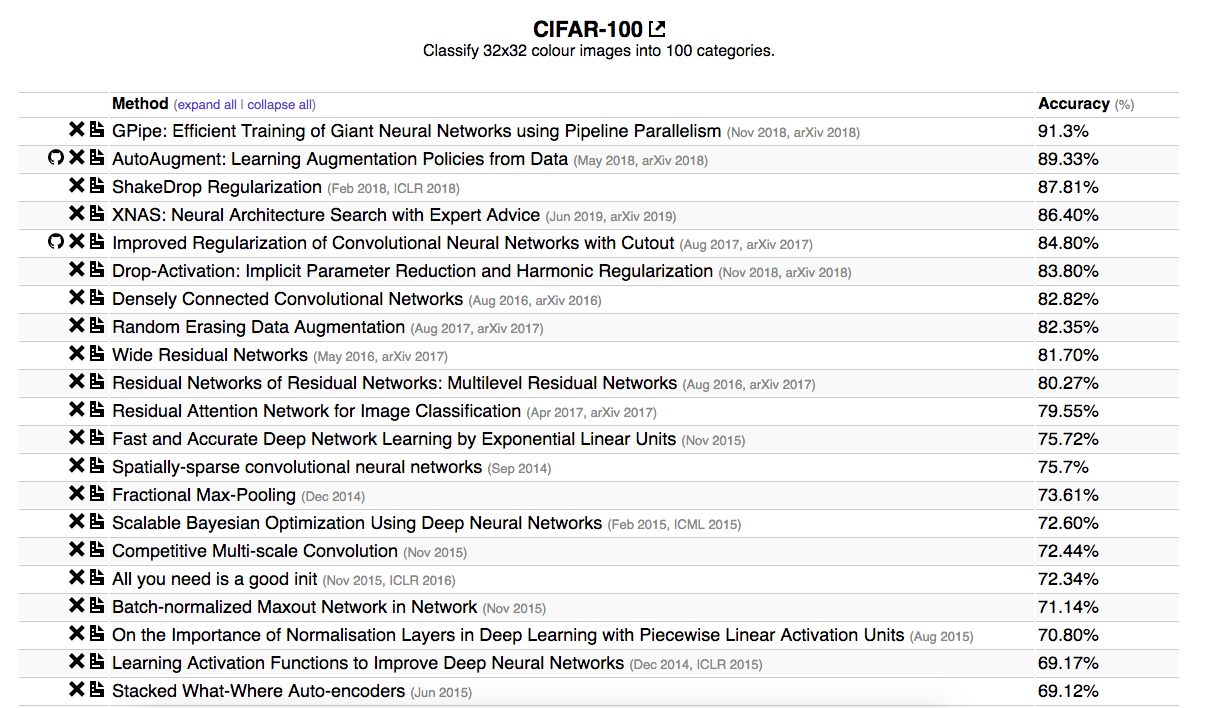

In [ ]:
def shapes(*x):
    for idx, item in enumerate(x):
        print(f"arg_{idx}: {item.shape}") if hasattr(item, "shape") else print(f"arg_{idx}: {len(item)}")

In [ ]:
from keras.datasets import cifar100
from tensorflow import keras
from IPython.display import clear_output

(x_train, y_train_r), (x_test, y_test_r) = cifar100.load_data(label_mode='fine')
x_train, x_test = x_train/255, x_test/255
y_train, y_test = keras.utils.to_categorical(y_train_r, 100), keras.utils.to_categorical(y_test_r, 100)
clear_output()
shapes(x_train, x_test, y_train_r, y_test_r, y_train, y_test)

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import time
!pip install git+https://github.com/netbrainml/nbml.git
from nbml.workshops.cifar100 import *

for i in np.random.permutation(len(x_train)-1)[:10]:
    plt.imshow(x_train[i])
    plt.title(vocab[int(y_train_r[i])])
    plt.show()
    time.sleep(0.5)
    clear_output(wait=True)

Using SLP and MLP on CIFAR100

In [ ]:
import tensorflow as tf
from tensorflow.python.client import device_lib
print(device_lib.list_local_devices())

In [ ]:
slp_model = keras.Sequential([keras.layers.Flatten(input_shape = (32,32,3)), keras.layers.Dense(512, activation=tf.nn.relu), keras.layers.Dense(100, activation=tf.nn.softmax)])
slp_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
slp_model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=5)

In [ ]:
mlp_model = keras.Sequential([keras.layers.Flatten(input_shape = (32,32,3)), keras.layers.Dense(512, activation=tf.nn.relu), keras.layers.Dense(256, activation=tf.nn.relu), keras.layers.Dense(100, activation=tf.nn.softmax)])
mlp_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
mlp_model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=5)

## Convolution Network
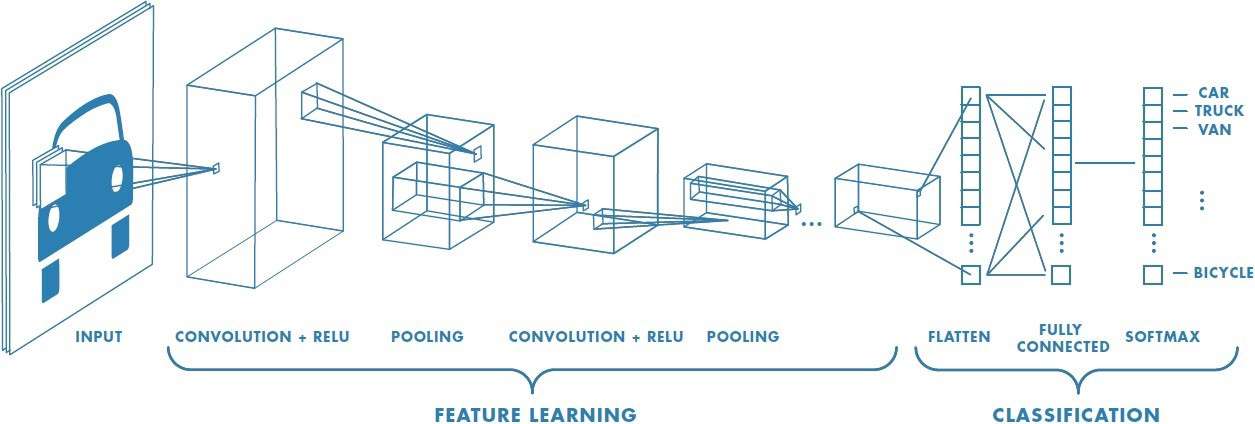

In [ ]:
conv_model = keras.Sequential([
    keras.layers.Conv2D(128, 3, 1, activation=tf.nn.relu, input_shape = (32,32,3)),
    keras.layers.Conv2D(256, 3, 1, activation=tf.nn.relu),
    keras.layers.Conv2D(512, 3, 1, activation=tf.nn.relu),
    keras.layers.Flatten(),
    keras.layers.Dense(4096, activation=tf.nn.relu),
    keras.layers.Dense(512, activation=tf.nn.relu),
    keras.layers.Dense(100, activation=tf.nn.softmax)
])

conv_model.compile(optimizer='adam', 
              loss='categorical_crossentropy',
              metrics=['accuracy'])

%time conv_model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=10)

Lets add MaxPool layers to reduce the dimensionality, which can actually help generalize the model better. The model without the pooling seems to overfit to the training set, as seen with the variance between the training and validation accuracy. Also notice the training time.

In [ ]:
def conv(nf): return keras.Sequential([keras.layers.Conv2D(nf, 3, 1, activation=tf.nn.relu),
                                       keras.layers.MaxPool2D(2,2, 'valid')])
convMP_model = keras.Sequential([
    keras.layers.Conv2D(128, 3, 1, activation=tf.nn.relu, input_shape = (32,32,3)),
    conv(256), conv(512),
    keras.layers.Flatten(),
    keras.layers.Dense(4096, activation=tf.nn.relu),
    keras.layers.Dense(512, activation=tf.nn.relu),
    keras.layers.Dense(100, activation=tf.nn.softmax)
])

convMP_model.compile(optimizer='adam', 
              loss='categorical_crossentropy',
              metrics=['accuracy'])

%time convMP_model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=10)